In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
house=pd.read_csv('Bengaluru_House_Data.csv')
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Shape

In [3]:
house.shape

(13320, 9)

## Missing Value

In [139]:
drop_col=house.isnull().mean()*100
drop_col

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
upd_price        0.000000
price_cat        0.000000
dtype: float64

In [136]:
drop_col[drop_col>15].keys()

Index(['size', 'society', 'bath', 'balcony'], dtype='object')

In [140]:
new_df=house.copy()

In [141]:
new_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,upd_price,price_cat
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,39.07,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,120.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,62.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,95.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,51.00,51.00
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,190.00,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,190.00,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,60.00,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,190.00,488.00


In [5]:
location_mode=house['location'].mode()
house['location']=house['location'].fillna(location_mode)

In [124]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   upd_price     13320 non-null  float64
 10  price_cat     13320 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.1+ MB


In [7]:
house['price'].skew()

8.064468821273252

In [8]:
house['upd_price']=house['price']
house['price_cat']=house['price']
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,upd_price,price_cat
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,39.07,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,120.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,62.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,95.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,51.00,51.00


## Capping outliers in upd_price for better results (IQR)

In [9]:
q1=house['upd_price'].quantile(0.25)
q3=house['upd_price'].quantile(0.75)
iqr=q3-q1
ul=q3+iqr
ll=q1-iqr
print(ul,ll)

190.0 -20.0


In [10]:
house['upd_price']=np.where(house['upd_price']>=ul,ul,np.where(house['upd_price']<=ll,ll,house['upd_price']))

In [11]:
house.sample(6)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,upd_price,price_cat
6794,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,NaN,3000,3.0,2.0,60.00,60.00,60.00
5126,Built-up Area,Ready To Move,Kasavanhalli,3 Bedroom,NaN,2111,4.0,3.0,120.00,120.00,120.00
3142,Super built-up Area,19-Dec,Hoodi,3 BHK,Caycend,1553,3.0,2.0,83.09,83.09,83.09
8393,Super built-up Area,Ready To Move,Hebbal Kempapura,2 BHK,Goateds,1400,2.0,2.0,108.00,108.00,108.00
1548,Built-up Area,Ready To Move,Sarjapur,2 BHK,NaN,1195,2.0,1.0,42.00,42.00,42.00
10858,Super built-up Area,Ready To Move,Kaval Byrasandra,3 BHK,SyOnen,1900,2.0,2.0,65.00,65.00,65.00


<AxesSubplot:xlabel='upd_price'>

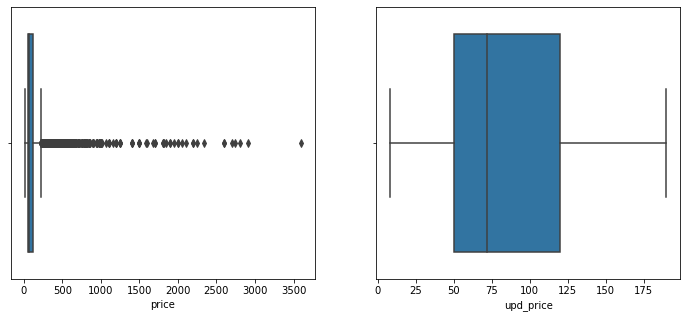

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(x=house['price'])
plt.subplot(122)
sns.boxplot(x=house['upd_price'])

In [13]:
house['upd_price'].skew()

0.8371594360210096

<AxesSubplot:ylabel='Density'>

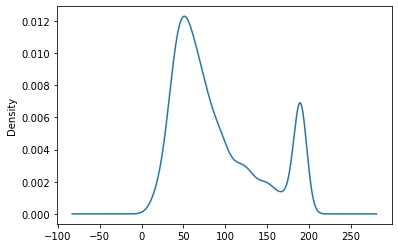

In [14]:
house['upd_price'].plot(kind='kde')

## capping price value with the help of other columns

In [15]:
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,upd_price,price_cat
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,39.07,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,120.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,62.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,95.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,51.00,51.00


<AxesSubplot:>

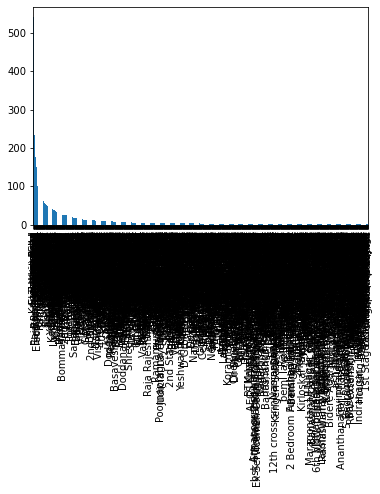

In [16]:
house['location'].value_counts().plot(kind='bar')

In [17]:
house['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<AxesSubplot:>

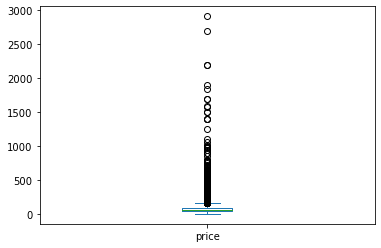

In [18]:
super_area=house[house['area_type']=='Super built-up  Area']
super_area['price'].plot(kind='box')

In [19]:
super_area.sample()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,upd_price,price_cat
1291,Super built-up Area,Ready To Move,Dooravani Nagar,3 BHK,Puceswn,1596,3.0,1.0,105.0,105.0,105.0


In [20]:
q11=super_area['price_cat'].quantile(0.25)
q31=super_area['price_cat'].quantile(0.75)
iqr1=q31-q11
ul1=q31+iqr1
ll1=q11-iqr1
super_area['price_cat']=np.where(super_area['price_cat']>=ul1,ul1,np.where(super_area['price_cat']<=ll1,ll1,super_area['price_cat']))

C:\Users\Pradeep\AppData\Local\Temp/ipykernel_13944/404650172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_area['price_cat']=np.where(super_area['price_cat']>=ul1,ul1,np.where(super_area['price_cat']<=ll1,ll1,super_area['price_cat']))


<AxesSubplot:>

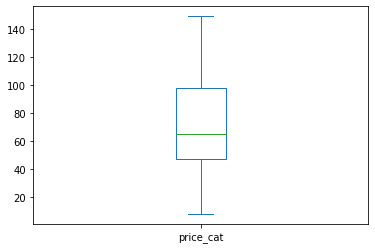

In [21]:
super_area['price_cat'].plot(kind='box')

<AxesSubplot:>

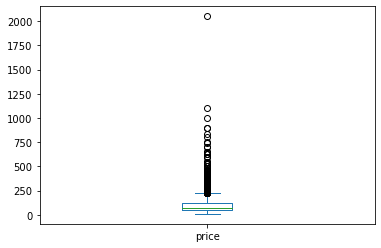

In [22]:
built_area=house[house['area_type']=='Built-up  Area']
built_area['price'].plot(kind='box')

In [23]:
q12=built_area['price_cat'].quantile(0.25)
q32=built_area['price_cat'].quantile(0.75)
iqr2=q32-q12
ul2=q32+iqr2
ll2=q12-iqr2
built_area['price_cat']=np.where(built_area['price_cat']>=ul2,ul2,np.where(built_area['price_cat']<=ll2,ll2,built_area['price_cat']))

C:\Users\Pradeep\AppData\Local\Temp/ipykernel_13944/1886029037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  built_area['price_cat']=np.where(built_area['price_cat']>=ul2,ul2,np.where(built_area['price_cat']<=ll2,ll2,built_area['price_cat']))


<AxesSubplot:>

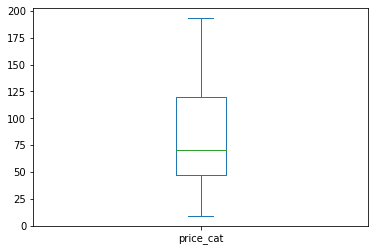

In [24]:
built_area['price_cat'].plot(kind='box')

<AxesSubplot:>

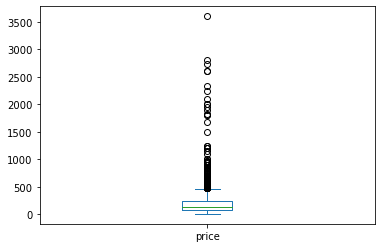

In [25]:
plot_area=house[house['area_type']=='Plot  Area']
plot_area['price'].plot(kind='box')

In [26]:
q13=plot_area['price_cat'].quantile(0.25)
q33=plot_area['price_cat'].quantile(0.75)
iqr3=q33-q13
ul3=q33+iqr3
ll3=q13-iqr3
plot_area['price_cat']=np.where(plot_area['price_cat']>=ul3,ul3,np.where(plot_area['price_cat']<=ll3,ll3,plot_area['price_cat']))

C:\Users\Pradeep\AppData\Local\Temp/ipykernel_13944/2983602829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_area['price_cat']=np.where(plot_area['price_cat']>=ul3,ul3,np.where(plot_area['price_cat']<=ll3,ll3,plot_area['price_cat']))


<AxesSubplot:>

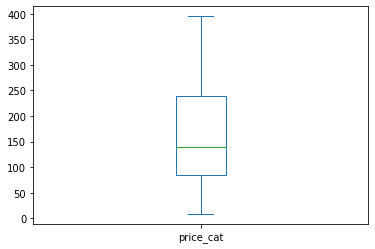

In [27]:
plot_area['price_cat'].plot(kind='box')

<AxesSubplot:>

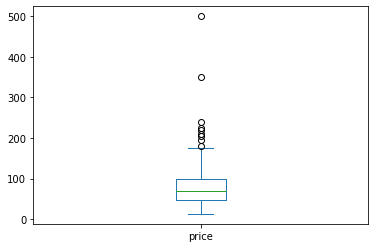

In [28]:
carpet_area=house[house['area_type']=='Carpet  Area']
carpet_area['price'].plot(kind='box')

In [29]:
q14=carpet_area['price_cat'].quantile(0.25)
q34=carpet_area['price_cat'].quantile(0.75)
iqr4=q34-q14
ul4=q34+iqr4
ll4=q14-iqr4
carpet_area['price_cat']=np.where(carpet_area['price_cat']>=ul4,ul4,np.where(carpet_area['price_cat']<=ll4,ll4,carpet_area['price_cat']))

C:\Users\Pradeep\AppData\Local\Temp/ipykernel_13944/1176826083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpet_area['price_cat']=np.where(carpet_area['price_cat']>=ul4,ul4,np.where(carpet_area['price_cat']<=ll4,ll4,carpet_area['price_cat']))


<AxesSubplot:>

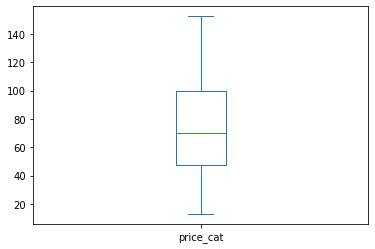

In [30]:
carpet_area['price_cat'].plot(kind='box')

In [31]:
house.shape

(13320, 11)

In [32]:
#super_area
#built_are
#plot_area
#carpet_area
super_area.shape
built_area.shape
plot_area.shape
carpet_area.shape
print(super_area.shape,built_area.shape,plot_area.shape,carpet_area.shape)

(8790, 11) (2418, 11) (2025, 11) (87, 11)


In [33]:
temp1=super_area.append(built_area)

In [34]:
temp2=temp1.append(plot_area)

In [35]:
final_house=temp2.append(carpet_area)

In [36]:
house['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

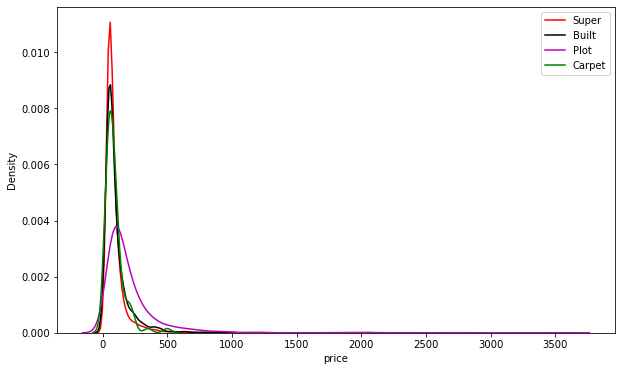

In [37]:
plt.figure(figsize=(10,6))
sns.kdeplot(house[house['area_type']=='Super built-up  Area']['price'],label='Super',color='r')
sns.kdeplot(house[house['area_type']=='Built-up  Area']['price'],label='Built',color='k')
sns.kdeplot(house[house['area_type']=='Plot  Area']['price'],label='Plot',color='m')
sns.kdeplot(house[house['area_type']=='Carpet  Area']['price'],label='Carpet',color='g')
plt.legend()
plt.show()

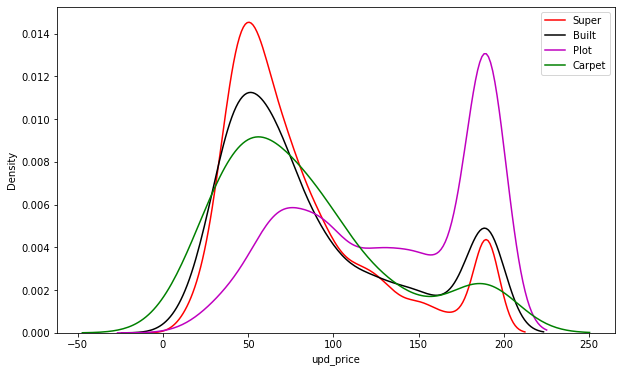

In [38]:
plt.figure(figsize=(10,6))
sns.kdeplot(house[house['area_type']=='Super built-up  Area']['upd_price'],label='Super',color='r')
sns.kdeplot(house[house['area_type']=='Built-up  Area']['upd_price'],label='Built',color='k')
sns.kdeplot(house[house['area_type']=='Plot  Area']['upd_price'],label='Plot',color='m')
sns.kdeplot(house[house['area_type']=='Carpet  Area']['upd_price'],label='Carpet',color='g')
plt.legend()
plt.show()

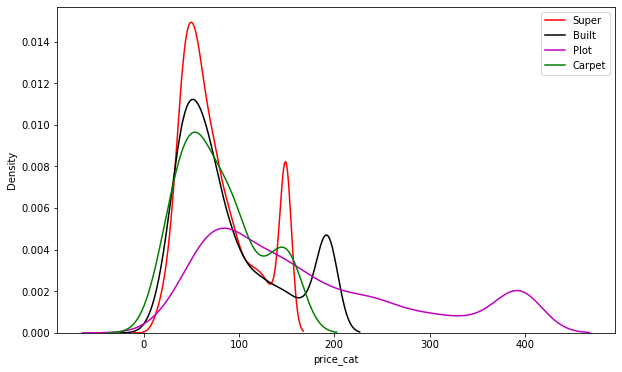

In [39]:
plt.figure(figsize=(10,6))
sns.kdeplot(final_house[final_house['area_type']=='Super built-up  Area']['price_cat'],label='Super',color='r')
sns.kdeplot(final_house[final_house['area_type']=='Built-up  Area']['price_cat'],label='Built',color='k')
sns.kdeplot(final_house[final_house['area_type']=='Plot  Area']['price_cat'],label='Plot',color='m')
sns.kdeplot(final_house[final_house['area_type']=='Carpet  Area']['price_cat'],label='Carpet',color='g')
plt.legend()
plt.show()

In [40]:
final_house['price_cat'].skew()

2.282347294390602

<AxesSubplot:>

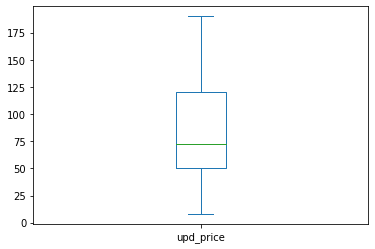

In [41]:
final_house['upd_price'].plot(kind='box')

In [42]:
final_house.describe()

,bath,balcony,price,upd_price,price_cat
count,13247.000000,12711.000000,13320.000000,13320.000000,13320.000000
mean,2.692610,1.584376,112.565627,89.491978,93.144929
std,1.341458,0.817263,148.971674,51.752077,67.128217
min,1.000000,0.000000,8.000000,8.000000,8.000000
25%,2.000000,1.000000,50.000000,50.000000,50.000000
50%,2.000000,2.000000,72.000000,72.000000,72.000000
75%,3.000000,2.000000,120.000000,120.000000,120.000000
max,40.000000,3.000000,3600.000000,190.000000,395.000000


In [43]:
final_house.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,upd_price,price_cat
2107,Built-up Area,18-Aug,Bommasandra Industrial Area,3 BHK,NaN,1320,2.0,1.0,38.12,38.12,38.12
3226,Super built-up Area,19-Aug,Sarjapura - Attibele Road,2 BHK,NaN,829,2.0,1.0,22.80,22.80,22.80
12032,Plot Area,Ready To Move,Xavier Layout,3 Bedroom,NaN,1524,4.0,2.0,400.00,190.00,395.00
12807,Super built-up Area,18-Apr,Hebbal,3 BHK,Arcia S,1430,3.0,1.0,85.00,85.00,85.00
9683,Plot Area,18-Apr,tc.palya,3 Bedroom,NaN,1400,2.0,1.0,78.00,78.00,78.00
7308,Super built-up Area,19-Dec,Chandapura,3 BHK,SuVue S,1110,2.0,2.0,29.97,29.97,29.97
6020,Super built-up Area,Ready To Move,Mahadevpura,2 BHK,3Codeli,1532,2.0,2.0,62.00,62.00,62.00
4272,Built-up Area,Ready To Move,Poorna Pragna Layout,2 BHK,Pathira,965,2.0,2.0,48.00,48.00,48.00
3489,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,1575,5.0,1.0,158.00,158.00,158.00
9945,Super built-up Area,Ready To Move,Vasanthapura,2 BHK,NaN,978,2.0,1.0,34.22,34.22,34.22


<AxesSubplot:xlabel='area_type', ylabel='upd_price'>

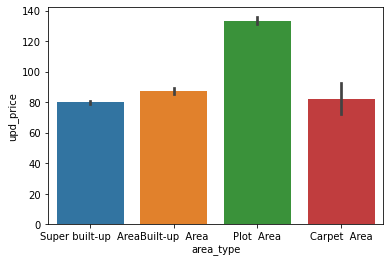

In [44]:
sns.barplot(x=final_house['area_type'],y=final_house['upd_price'])

In [45]:
final_house['availability']=final_house['availability'].str.extract('([A-Z][a-z]*)')

<AxesSubplot:xlabel='availability', ylabel='upd_price'>

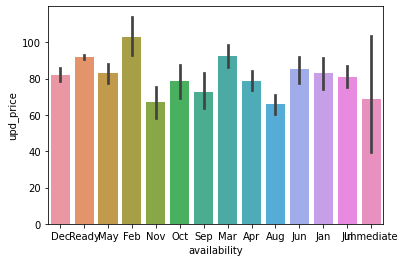

In [46]:
sns.barplot(x=final_house['availability'],y=final_house['upd_price'])

In [47]:
final_house.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
upd_price          0
price_cat          0
dtype: int64

In [48]:
final_house['availability'].unique()

array(['Dec', 'Ready', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar', 'Apr',
       'Aug', 'Jun', 'Jan', 'Jul', 'Immediate'], dtype=object)

In [49]:
def category(text):
    if text=='Jan' or text=='Feb' or text=='Mar' or text=='Apr':
        return 'cat1'
    elif text=='May' or text=='Jun' or text=='Jul' or text=='Aug':
        return 'cat2'
    elif text=='Sep' or text=='Oct' or text=='Nov' or text=='Dec':
        return 'cat3'
    else:
        return 'cat4'

In [50]:
final_house['temp_avail']=final_house['availability'].apply(category)

<AxesSubplot:xlabel='temp_avail', ylabel='upd_price'>

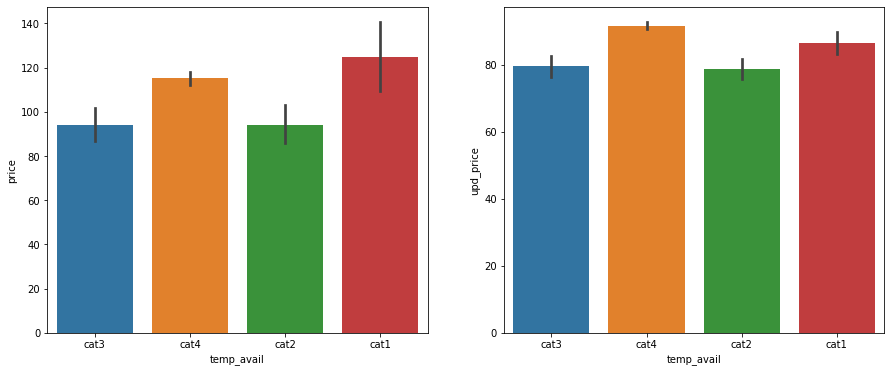

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.barplot(x=final_house['temp_avail'],y=final_house['price'])
plt.subplot(122)
sns.barplot(x=final_house['temp_avail'],y=final_house['upd_price'])

In [52]:
final_house.drop(['availability','price_cat'],axis=1,inplace=True)

In [53]:
final_house.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,upd_price,temp_avail
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,39.07,cat3
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,95.00,cat4
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,51.00,cat4
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,38.00,cat4
6,Super built-up Area,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,190.00,cat2


In [54]:
final_house['location'].unique()

array(['Electronic City Phase II', 'Lingadheeranahalli', 'Kothanur', ...,
       'Iggalur', 'K R C kothanur', 'Hommadevanahalli'], dtype=object)

In [55]:
final_house['location'].nunique()

1305

In [56]:
final_house['location']=final_house['location'].fillna(final_house['location'].mode())

In [57]:
#cat1 less than 180,x
#cat 2 180-360,y
#cat3 360+,z


In [58]:
x=final_house['location'].value_counts()<180
x=list(x[x].keys())
len(x)

1298

In [59]:
y=((final_house['location'].value_counts()>180) & (final_house['location'].value_counts()<360))
y=list(y[y].keys())
y

['Electronic City',
 'Kanakpura Road',
 'Thanisandra',
 'Yelahanka',
 'Uttarahalli']

In [60]:
z=final_house['location'].value_counts()>360
z=list(z[z].keys())
z

['Whitefield', 'Sarjapur  Road']

In [61]:
def location_changer(text):
    if text in x:
        return 'r1'
    if text in y:
        return 'r2'
    if text in z:
        return 'r3'

In [62]:
'Whitefield' in z

True

In [63]:
final_house['location']=final_house['location'].apply(location_changer)

In [64]:
final_house.sample(5)

,area_type,location,size,society,total_sqft,bath,balcony,price,upd_price,temp_avail
9442,Super built-up Area,r1,2 BHK,SLtias,795,2.0,1.0,32.54,32.54,cat4
1044,Plot Area,r1,6 Bedroom,NaN,3968,5.0,2.0,900.00,190.00,cat4
6831,Plot Area,r3,4 Bedroom,Pronege,4800,5.0,2.0,550.00,190.00,cat4
12260,Plot Area,r1,4 Bedroom,NaN,2400,4.0,3.0,470.00,190.00,cat4
309,Super built-up Area,r1,3 BHK,Maerar,1850,3.0,3.0,150.00,150.00,cat4


<AxesSubplot:xlabel='location', ylabel='upd_price'>

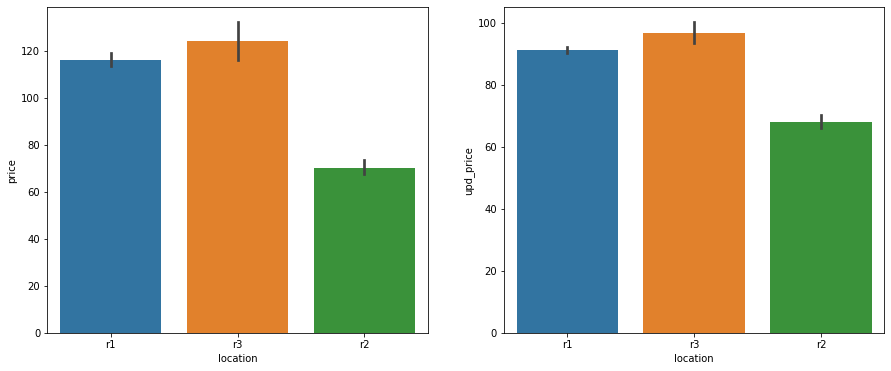

In [65]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.barplot(x=final_house['location'],y=final_house['price'])
plt.subplot(122)
sns.barplot(x=final_house['location'],y=final_house['upd_price'])

In [66]:
final_house.isnull().mean()*100

area_type      0.000000
location       0.007508
size           0.120120
society       41.306306
total_sqft     0.000000
bath           0.548048
balcony        4.572072
price          0.000000
upd_price      0.000000
temp_avail     0.000000
dtype: float64

In [67]:
final_house['size'].mode()

0    2 BHK
dtype: object

In [68]:
final_house['size']=final_house['size'].replace(np.nan,'2')

In [69]:
final_house['size'].unique()

array(['2 BHK', '3 BHK', '4 BHK', '1 RK', '1 BHK', '5 BHK', '7 BHK',
       '6 BHK', '11 BHK', '9 BHK', '4 Bedroom', '27 BHK', '10 BHK',
       '19 BHK', '16 BHK', '14 BHK', '8 BHK', '13 BHK', '8 Bedroom',
       '6 Bedroom', '3 Bedroom', '5 Bedroom', '2 Bedroom', '1 Bedroom',
       '9 Bedroom', '7 Bedroom', '10 Bedroom', '2', '11 Bedroom',
       '43 Bedroom', '12 Bedroom', '18 Bedroom'], dtype=object)

In [70]:
final_house['size']=final_house['size'].str.extract('(\d+)')

In [71]:
final_house['size'].isnull().sum()

0

In [72]:
final_house.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,upd_price,temp_avail
0,Super built-up Area,r1,2,Coomee,1056,2.0,1.0,39.07,39.07,cat3
3,Super built-up Area,r1,3,Soiewre,1521,3.0,1.0,95.00,95.00,cat4
4,Super built-up Area,r1,2,NaN,1200,2.0,1.0,51.00,51.00,cat4
5,Super built-up Area,r3,2,DuenaTa,1170,2.0,1.0,38.00,38.00,cat4
6,Super built-up Area,r1,4,Jaades,2732,4.0,NaN,204.00,190.00,cat2


In [73]:
final_house.drop(['society'],axis=1,inplace=True)

In [74]:
final_house.rename(columns={'temp_avail':'availabilty'},inplace=True)

In [75]:
final_house['size']=final_house['size'].astype('int')

In [76]:
final_house.head()

,area_type,location,size,total_sqft,bath,balcony,price,upd_price,availabilty
0,Super built-up Area,r1,2,1056,2.0,1.0,39.07,39.07,cat3
3,Super built-up Area,r1,3,1521,3.0,1.0,95.00,95.00,cat4
4,Super built-up Area,r1,2,1200,2.0,1.0,51.00,51.00,cat4
5,Super built-up Area,r3,2,1170,2.0,1.0,38.00,38.00,cat4
6,Super built-up Area,r1,4,2732,4.0,NaN,204.00,190.00,cat2


In [77]:
final_house['total_sqft'].value_counts()

1200           843
1100           221
1500           205
2400           196
600            180
              ... 
1542.14          1
2144.6           1
1087             1
2462 - 2467      1
2282             1
Name: total_sqft, Length: 2117, dtype: int64

In [78]:
import re

In [79]:

def cleaner(text):
    li=text.split()
    if len(li)==1:
        checker=li[0]
        finder=re.findall('([A-Z][a-z]*)',checker)
        if len(finder)==1:
            if finder == 'Acres':
                val=num_val * 43560.0
                return float(val)
            elif finder == 'Guntha':
                val=num_val * 1089.0
                return float(val)
            elif finder == 'Grounds':
                val=num_val * 2400.0
                return float(val)
            elif finder == 'Perch':
                val=num_val * 272.25
                return float(val)
        else:
            try:
                return float(text)
            except:
                return text
    if len(li)==2:
        raw_val=li[0]
        num_val=re.findall('(\d+.\d+)',raw_val)
        unit=li[1]
        
        if unit == 'Sq. Meter':
            val=num_val * 10.7639
            return float(val)
        elif unit == 'Sq. Yards':
            val =num_val * 9.0
            return float(val)
        elif unit == 'Cents':
            val=num_val * 435.61545
            return float(val)
    if len(li)==3:
        val =(float(li[0])+float(li[2]))/2
        return val
     

## Total me bbharne ke liye

In [80]:
temp_mode=final_house['total_sqft'].mode()

In [81]:
final_house['total_sqft']=final_house['total_sqft'].fillna(temp_mode)

In [82]:
final_house.isnull().sum()

area_type        0
location         1
size             0
total_sqft       0
bath            73
balcony        609
price            0
upd_price        0
availabilty      0
dtype: int64

In [83]:
final_house['sqft']=final_house['total_sqft'].apply(cleaner)

In [84]:
final_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 0 to 13305
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area_type    13320 non-null  object 
 1   location     13319 non-null  object 
 2   size         13320 non-null  int32  
 3   total_sqft   13320 non-null  object 
 4   bath         13247 non-null  float64
 5   balcony      12711 non-null  float64
 6   price        13320 non-null  float64
 7   upd_price    13320 non-null  float64
 8   availabilty  13320 non-null  object 
 9   sqft         13274 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.6+ MB


In [85]:
final_house['sqft']=final_house['sqft'].astype('float')

In [86]:
final_house.drop(['total_sqft'],axis=1,inplace=True)

In [87]:
final_house

,area_type,location,size,bath,balcony,price,upd_price,availabilty,sqft
0,Super built-up Area,r1,2,2.0,1.0,39.07,39.07,cat3,1056.0
3,Super built-up Area,r1,3,3.0,1.0,95.00,95.00,cat4,1521.0
4,Super built-up Area,r1,2,2.0,1.0,51.00,51.00,cat4,1200.0
5,Super built-up Area,r3,2,2.0,1.0,38.00,38.00,cat4,1170.0
6,Super built-up Area,r1,4,4.0,NaN,204.00,190.00,cat2,2732.0
...,...,...,...,...,...,...,...,...,...
13006,Carpet Area,r1,3,3.0,1.0,42.00,42.00,cat4,1280.0
13183,Carpet Area,r1,2,1.0,1.0,65.00,65.00,cat4,600.0
13214,Carpet Area,r1,3,2.0,1.0,85.00,85.00,cat4,1470.0
13238,Carpet Area,r1,2,2.0,3.0,70.00,70.00,cat1,1200.0


In [88]:
final_house.isnull().sum()

area_type        0
location         1
size             0
bath            73
balcony        609
price            0
upd_price        0
availabilty      0
sqft            46
dtype: int64

In [89]:
final_house['p_per_sqft']=final_house['upd_price']*1000000/final_house['sqft']

In [90]:
final_house['size'].skew()

4.823509590691522

In [91]:
q1=final_house['size'].quantile(0.25)
q3=final_house['size'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print(ll,ul)

0.5 4.5


In [92]:
final_house['size']=np.where(final_house['size']>ul,ul,final_house['size'])

In [93]:
final_house.sample(10)

,area_type,location,size,bath,balcony,price,upd_price,availabilty,sqft,p_per_sqft
12171,Super built-up Area,r1,2.0,2.0,1.0,40.00,40.00,cat4,900.0,44444.444444
126,Built-up Area,r1,3.0,3.0,2.0,65.00,65.00,cat4,1600.0,40625.000000
9313,Plot Area,r1,4.0,4.0,1.0,125.00,125.00,cat4,1200.0,104166.666667
10082,Super built-up Area,r1,2.0,2.0,3.0,85.00,85.00,cat4,1340.0,63432.835821
2190,Plot Area,r1,4.0,4.0,1.0,200.00,190.00,cat4,1350.0,140740.740741
9771,Plot Area,r1,4.0,3.0,3.0,130.00,130.00,cat4,2970.0,43771.043771
13060,Super built-up Area,r1,3.0,3.0,NaN,81.00,81.00,cat4,1674.0,48387.096774
4200,Super built-up Area,r1,2.0,2.0,2.0,38.85,38.85,cat4,1110.0,35000.000000
307,Super built-up Area,r1,3.0,3.0,2.0,95.00,95.00,cat4,1665.0,57057.057057
8164,Super built-up Area,r1,3.0,3.0,3.0,51.77,51.77,cat4,1531.0,33814.500327


In [94]:
final_house.isnull().sum()

area_type        0
location         1
size             0
bath            73
balcony        609
price            0
upd_price        0
availabilty      0
sqft            46
p_per_sqft      46
dtype: int64

In [95]:
bath_mean=final_house['bath'].mean()
final_house['bath']=final_house['bath'].fillna(bath_mean)

In [96]:
q1=final_house['bath'].quantile(0.25)
q3=final_house['bath'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print(ll,ul)

0.5 4.5


In [97]:
final_house['bath']=np.where(final_house['bath']>ul,ul,np.where(final_house['bath']<ll,ll,final_house['bath']))

<AxesSubplot:>

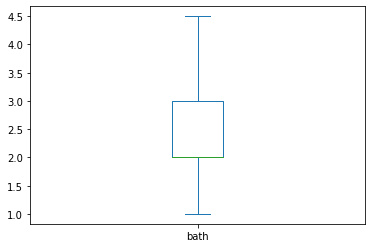

In [98]:
final_house['bath'].plot(kind='box')

In [99]:
balc_meadian=final_house['balcony'].median()
final_house['balcony']=final_house['balcony'].fillna(balc_meadian)

In [100]:
q1=final_house['balcony'].quantile(0.25)
q3=final_house['balcony'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print(ll,ul)

-0.5 3.5


In [101]:
final_house['balcony']=np.where(final_house['balcony']>ul,ul,np.where(final_house['balcony']<0,0,final_house['balcony']))

<AxesSubplot:>

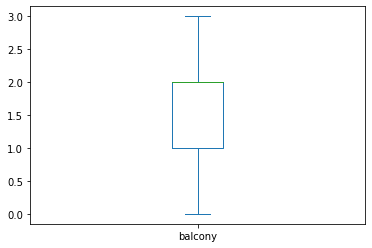

In [102]:
final_house['balcony'].plot(kind='box')

In [103]:
final_house.isnull().sum()

area_type       0
location        1
size            0
bath            0
balcony         0
price           0
upd_price       0
availabilty     0
sqft           46
p_per_sqft     46
dtype: int64

In [104]:
final_house.dropna(inplace=True)

In [105]:
final_house.drop(['p_per_sqft'],axis=1,inplace=True)

In [106]:
final_house['area_type'].unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [107]:
location_mapper={'r3':3,'r1':2,'r2':1}
area_mapper={'Super built-up  Area':2,'Built-up  Area':3,'Plot  Area':4,'Carpet  Area':1}
avail_mapper={'cat1':3,'cat2':1,'cat3':2,'cat4':4}

In [108]:
final_house['upd_loc']=final_house['location'].map(location_mapper)

In [109]:
final_house['upd_avail']=final_house['availabilty'].map(avail_mapper)

In [110]:
final_house['upd_area']=final_house['area_type'].map(area_mapper)

In [111]:
final_house.sample(10)

,area_type,location,size,bath,balcony,price,upd_price,availabilty,sqft,upd_loc,upd_avail,upd_area
1395,Super built-up Area,r2,2.0,2.00000,2.0,42.10,42.10,cat4,1185.0,1,4,2
6162,Plot Area,r1,3.0,3.00000,2.0,92.00,92.00,cat4,1400.0,2,4,4
10553,Built-up Area,r3,4.0,2.69261,2.0,222.00,190.00,cat4,3418.0,3,4,3
7545,Built-up Area,r1,3.0,2.00000,1.0,67.00,67.00,cat4,1300.0,2,4,3
1810,Super built-up Area,r2,3.0,3.00000,3.0,64.50,64.50,cat4,1570.0,1,4,2
9899,Super built-up Area,r1,2.0,2.00000,2.0,50.00,50.00,cat1,966.0,2,3,2
6581,Super built-up Area,r3,3.0,2.00000,0.0,40.72,40.72,cat4,1272.5,3,4,2
11601,Super built-up Area,r1,2.0,2.00000,3.0,75.00,75.00,cat4,1192.0,2,4,2
8420,Super built-up Area,r1,3.0,4.00000,2.0,153.00,153.00,cat4,2072.0,2,4,2
8609,Super built-up Area,r1,2.0,2.00000,1.0,83.87,83.87,cat4,1407.0,2,4,2


In [112]:
mod1=final_house.copy()

In [113]:
mod1.drop(['area_type','location','availabilty','price'],axis=1,inplace=True)

In [114]:
mod1.corr()['upd_price']

size         0.679645
bath         0.718558
balcony      0.194389
upd_price    1.000000
sqft         0.505896
upd_loc      0.118972
upd_avail    0.085691
upd_area     0.332960
Name: upd_price, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(mod1[['size','bath','balcony','sqft','upd_loc','upd_avail','upd_area']],mod1[['upd_price']],test_size=0.2,random_state=1)

In [116]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [117]:
lr.fit(x_train,y_train)

LinearRegression()

In [118]:
lr.score(x_test,y_test)

0.6220234480209654